## Objective 

To build a classifier to classify 7 distinct glass types using <b>Random Tree</b> classifier.

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

## Dataset

- This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values

In [4]:
# Importing Dataset
import os

data = pd.read_csv('../Random Forests/glass.csv')

In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Here we can clearly see that the Std values of the "Type, Fe, Ba, K" columns are too large compared to the Mean values of other features
This can adversely affect the performance of our models. So after we set up our models, maybe we can eliminate some columns (except the Type column, because that target column) through some methods such as 'Backward Elimination'

In [8]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### Checking for null values

In [9]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### What do 'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe' mean?
RI -> refractive index',
<br>
Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)',
<br>
Mg -> Magnesium,
<br>
Al -> Aluminum,
<br>
Si -> Silicon,
<br> 
Ca  -> Potassium, 
<br>
Ba -> Barium,
<br>
Fe -> Iron

### calculating unique values and their occurance times

In [10]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### What do 1,2,3,5,6,7 Types mean?

1 -> building_windows_float_processed,
<br>
2 -> building_windows_non_float_processed,
<br>
3 -> vehicle_windows_float_processed,
<br>
4 -> vehicle_windows_non_floatprocessed (none in this database),
<br>
5 -> containers,
<br>
6 -> tableware, 
<br>
7 -> headlamps


<AxesSubplot:xlabel='Type', ylabel='count'>

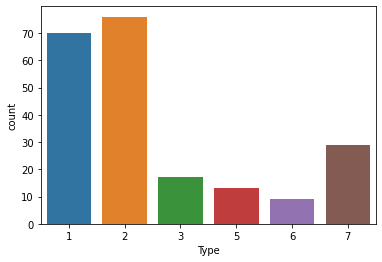

In [11]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Type', data=data)

#### Here we can see that the data is preety imbalanced. So we will use F1 score to evaluate this model

### Checking correlation using matrix

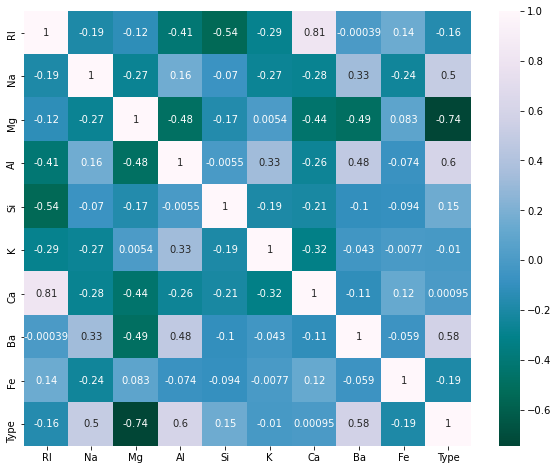

In [12]:
plt.figure(figsize=(10, 8))

corr = data.corr()
sns.heatmap(data=corr, annot=True, cmap='PuBuGn_r')
plt.show()

## Train-Test split

In [13]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 53, test_size = 0.20)

## Training The Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators = 250, criterion = 'entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

### Predictions

In [18]:
y_pred = rf.predict(x_test)

## Model Evaluation

In [19]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 4,  0,  0,  0,  0,  0],
       [ 2, 11,  0,  0,  1,  0],
       [ 3,  1,  2,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  1],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0,  0,  7]])

In [20]:
# f1_score

from sklearn.metrics import f1_score

print('f1_score', round(f1_score(y_test, y_pred, average = 'micro')*100, 2))

f1_score 72.09


In [21]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cross_val_score(rf, x, y, cv=5)

array([0.76744186, 0.72093023, 0.60465116, 0.60465116, 0.73809524])

In [22]:
## Average Accuracy 

print('Accuracy: {}%'.format(round(np.mean(cross_val_score(rf, x, y, cv=10))*100, 2)))

Accuracy: 73.38%


In [23]:
# Standard Deviation
print(f'std : {round(np.std(cross_val_score(rf, x, y, cv=6))*100, 2)}%')

std : 6.72%


## Conclusion : There is no overfitting as f1_score and Accuracy are very close to each other, good.